In [1]:
import sys
import numpy as np
# import tensorflow as tf
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim import lr_scheduler
# import torchvision

In [2]:
%load_ext autoreload
from Experiment import (  # .Experiment,  .
    # DataABC
        DataPPP,
        Raw_Data,
        DataAnalyzer,
    # ModelABC
        Prophet_Model,
        LightGBM_Model,
        RandomForest_Model,
        XGBoost_Model,
    # ExpermentABC
        Basic_ExpTrain,
        Basic_ExpEvaluate,
)
from Experiment.example_datas import (
    # 試しデータセット集
    Example_DemandForecasting,
    Example_RestaurantRevenue,
    # Example_RecruitRestaurant,
    # Example_AshraeEnergy, 
)
%autoreload

Importing plotly failed. Interactive plots will not work.


In [3]:
exp_set = []
models = [
    Prophet_Model(), 
    # LightGBM_Model(),
    # RandomForest_Model(),
#     XGBoost_Model(),
]  # LSTM_Model()

dataPPP = None
example_dataset = None

In [4]:
arg = 'demand_forecasting'
# arg = 'restaurant_revenue'

if arg == 'demand_forecasting':
    example_dataset = Example_DemandForecasting()
    # data_analyzer = DataAnalyzer(example_dataset.dataPPP)
    # data_analyzer.show_analyzed()
    # data_analyzer.plot_numerical_dist()
    # sys.exit()
    ## データ読み込み
    store_item_id_tuple = (9,11)
    example_dataset.initialize_dataPPP(
        store_item_id_tuple=(3,8),
        clmns_conv_dict = {
            'date':'stream0', 'store':'class0', 'item':'class1',
            'sales':'num0',},
        clmns_XQA = {
            'X' : ['stream0', 'class0', 'class1',],
            'Q' : None,
            'Y' : ['num0'], },
        is_shuffle=True,)
elif arg == 'restaurant_revenue':
    # LightGBM_Model のやつ
    # https://career-tech.biz/2019/10/16/python-kaggle-restaurant/
    ## 可視化
    example_dataset = Example_RestaurantRevenue()
    # data_analyzer = DataAnalyzer(example_dataset.dataPPP)
    # data_analyzer.show_analyzed()
    # data_analyzer.plot_numerical_dist()
    # sys.exit()
    ## データ読み込み
    example_dataset.initialize_dataPPP(
        clmns_conv_dict = {
            'Age':'class0', 'City':'class1', 'City Group':'class2', 'Type':'class3',  'Open Date':'date0',
            'P1':'num1', 'P2':'num2', 'P3':'num3', 'P4':'num4', 'P5':'num5', 'P6':'num6', 'P7':'num7', 'P8':'num8', 'P9':'num9', 'P10':'num10', 
            'P11':'num11', 'P12':'num12', 'P13':'num13', 'P14':'num14', 'P15':'num15', 'P16':'num16', 'P17':'num17', 'P18':'num18', 'P19':'num19', 'P20':'num20', 
            'P21':'num21', 'P22':'num22', 'P23':'num23', 'P24':'num24', 'P25':'num25', 'P26':'num26', 'P27':'num27', 'P28':'num28', 'P29':'num29', 'P30':'num30', 
            'P31':'num31', 'P32':'num32', 'P33':'num33', 'P34':'num34', 'P35':'num35', 'P36':'num36', 'P37':'num37',  'revenue':'num38'},
        clmns_XQA = {
            'X' : [
                'date0', #'class0', 'class1', 'class2',
                'num1',  'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8', 'num9', 'num10', 
                'num11', 'num12', 'num13', 'num14', 'num15', 'num16', 'num17', 'num18', 'num19', 'num20', 
                'num21', 'num22', 'num23', 'num24', 'num25', 'num26', 'num27', 'num28', 'num29', 'num30', 
                'num31', 'num32', 'num33', 'num34', 'num35', 'num36', 'num37', ],
            'Q' : None,
            'Y' : ['num38'], },)
    # ppp = example_dataset.dataPPP
    # data_analyzer = DataAnalyzer(ppp)
    # data_analyzer.show_counts()
    # print(data_analyzer.missing_table())
    # data_analyzer.plot_numerical_dist('restaurant_revenue')
    # data_analyzer.plot_categorical_dist('restaurant_revenue')
elif arg == 'recruit_restaurant':
    # 平均値 のやつ
    pass
elif arg == 'ashrae_energy':
    pass
else:
    raise NotImplementedError('[Error] そのデータセットは未実装です。')

for model in models:
    if isinstance(model, Prophet_Model):
        if 'stream0' not in example_dataset.dataPPP.X_train.columns:
            print('[Error] 時系列データ（ds = stream0）が含まれていません。終了します。')
            continue
    exp_set.append(
        {
            'exp_name' : arg,
            'dataABC'  : example_dataset.get_dataABC(),
            'modelABC' : model,
        }
    )

# example_dataset.get_dataABC().X_train.head()

,stream0,class0,class1
131472,2013-01-01,3,8
131473,2013-01-02,3,8
131474,2013-01-03,3,8
131475,2013-01-04,3,8
131476,2013-01-05,3,8


In [5]:
# Train
exp_train = Basic_ExpTrain(exp_set)
exp_train.exec()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[Info] Experiment： demand_forecasting Train


0       39.855150
1       39.818438
2       45.868215
3       50.975212
4       50.975212
          ...    
2369    75.107740
2370    80.276353
2371    80.276353
2372    87.289132
2373    91.630393
Name: yhat, Length: 2374, dtype: float64         num0
132676   115
132065   103
132819    89
132478    95
132696    78
...      ...
132142   106
131556    50
132243    70
132648    67
132250    62

[548 rows x 1 columns]


ValueError: Found input variables with inconsistent numbers of samples: [548, 2374]

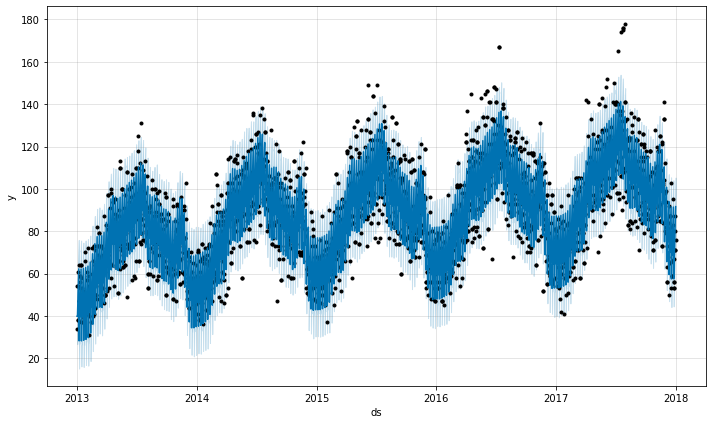

In [6]:
# Evaluate
exp_eval = Basic_ExpEvaluate(exp_set)
exp_eval.exec(print_eval=True, is_output_csv=True, output_rootpath='')